In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import load_codebooks, reduce_dimensionality_tsne, reduce_dimensionality_pca
import os
import shutil

params = {
    "figure.figsize": [9, 6],
    "axes.labelsize": 14,
    "axes.titlesize": 18,
    "axes.titlepad": 15,
    "font.size": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "text.usetex": True if shutil.which("latex") else False,
    "font.family": "serif",
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "xtick.top": True,
    "ytick.left": True,
    "ytick.right": True,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.minor.size": 2.5,
    "xtick.major.size": 5,
    "ytick.minor.size": 2.5,
    "ytick.major.size": 5,
    "axes.axisbelow": True,
    "figure.dpi": 200,
}
plt.rcParams.update(params)

In [2]:
def visualize_codebooks(reduced_codebooks, labels, title, method_name):
    plt.figure(figsize=(10, 8))
    colors = ["blue", "green", "red"]
    for i, codebook in enumerate(reduced_codebooks):
        plt.scatter(
            codebook[:, 0],
            codebook[:, 1],
            label=labels[i],
            c=colors[i],
            alpha=0.6,
            edgecolors="w",
            s=100,
        )

    plt.title(f"{title} ({method_name})")
    plt.xlabel(f"{method_name} 1")
    plt.ylabel(f"{method_name} 2")
    plt.legend()
    plt.grid(True)
    plt.show()


def visualize_codebooks_from_paths(file_paths, labels):
    codebooks = load_codebooks(file_paths)

    if len(codebooks) != len(labels):
        print("Error: The number of codebooks does not match the number of labels.")
        return

    reduced_codebooks_pca = reduce_dimensionality_pca(codebooks)
    visualize_codebooks(
        reduced_codebooks_pca, labels, "Visualization of Codebooks", "PCA"
    )

    reduced_codebooks_tsne = reduce_dimensionality_tsne(codebooks)
    visualize_codebooks(
        reduced_codebooks_tsne, labels, "Visualization of Codebooks", "t-SNE"
    )

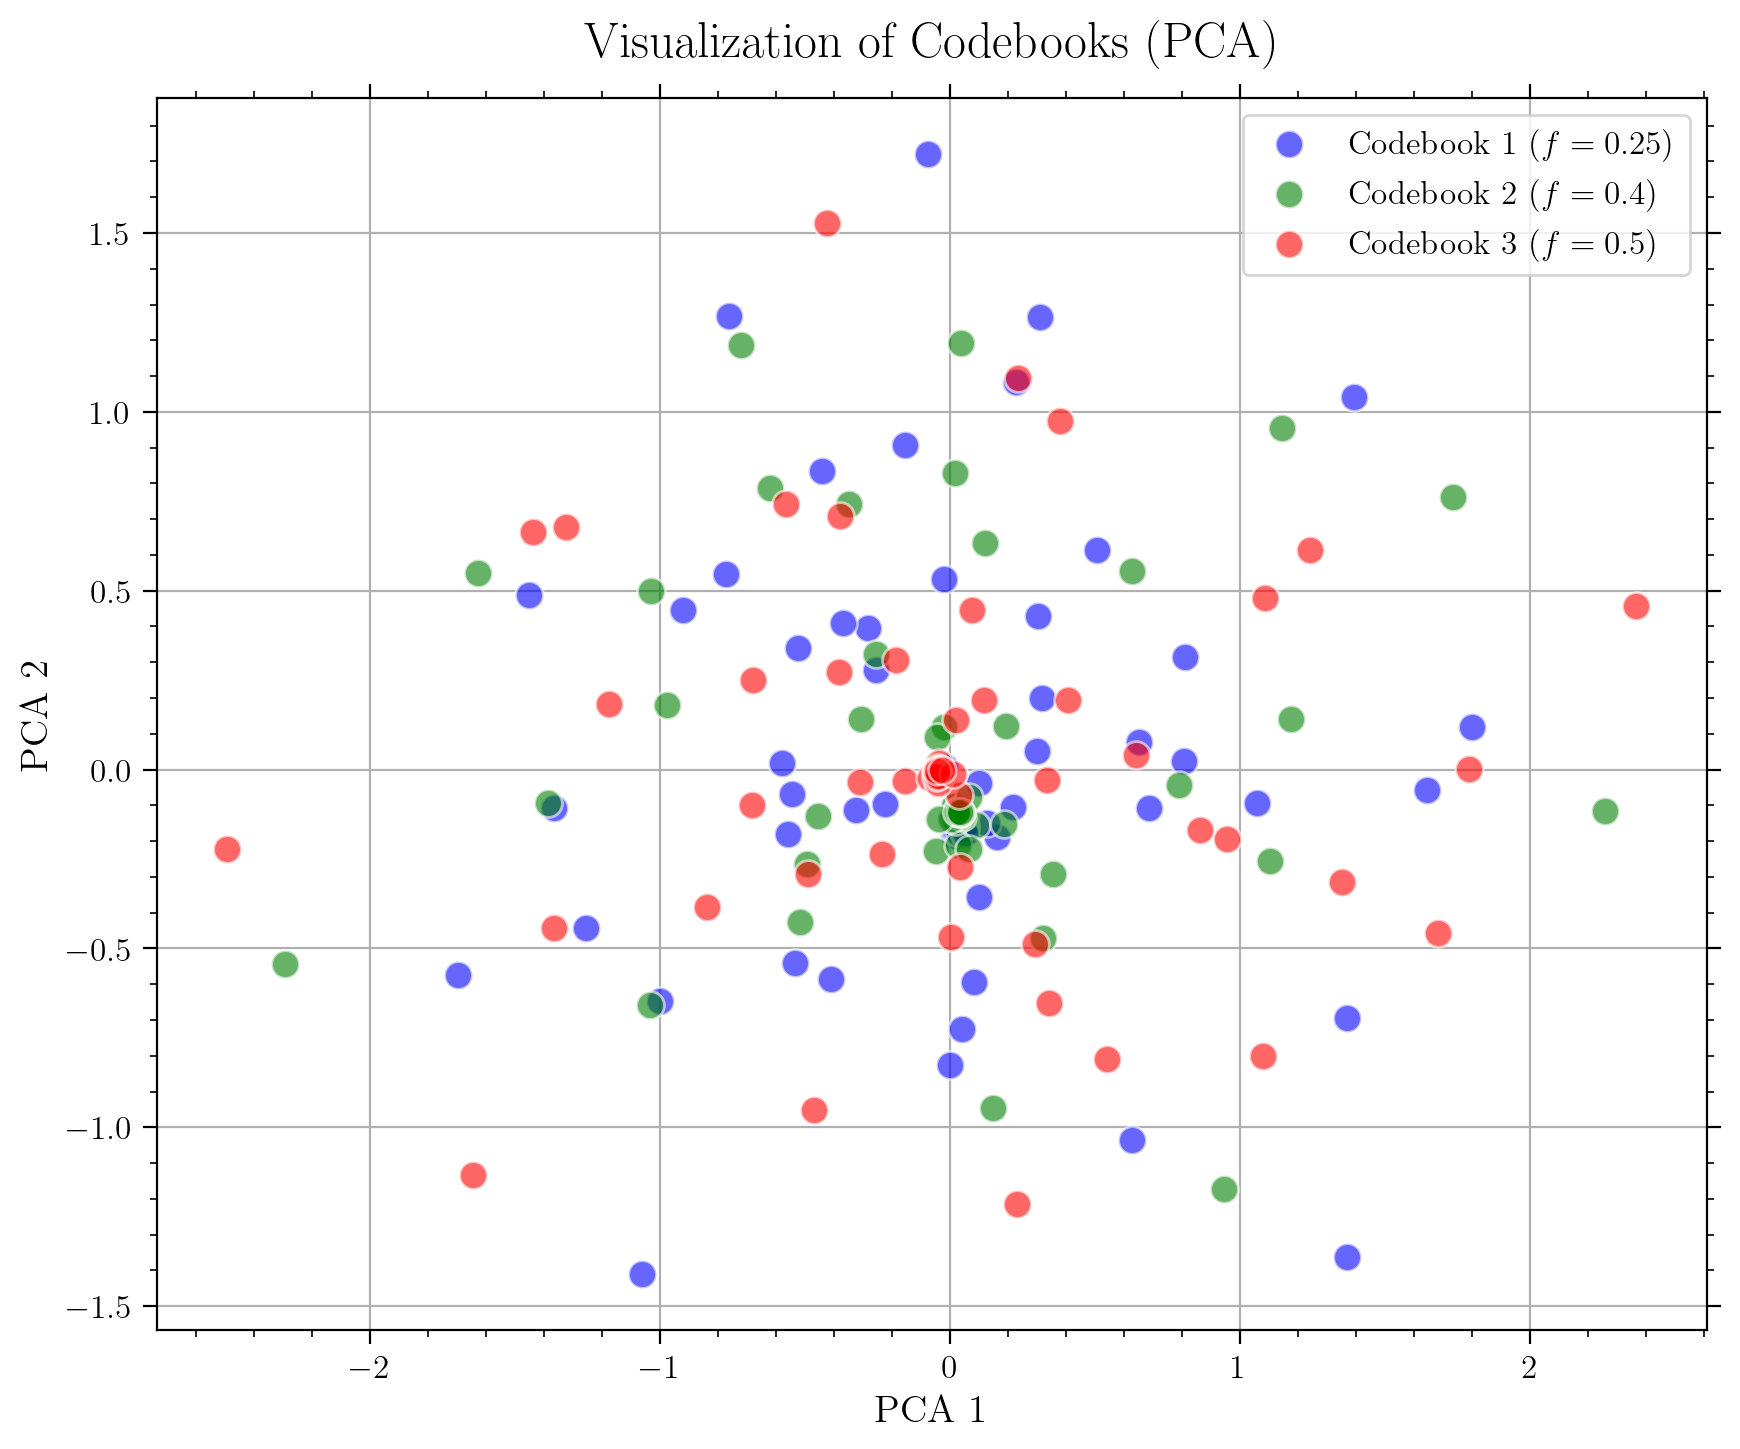

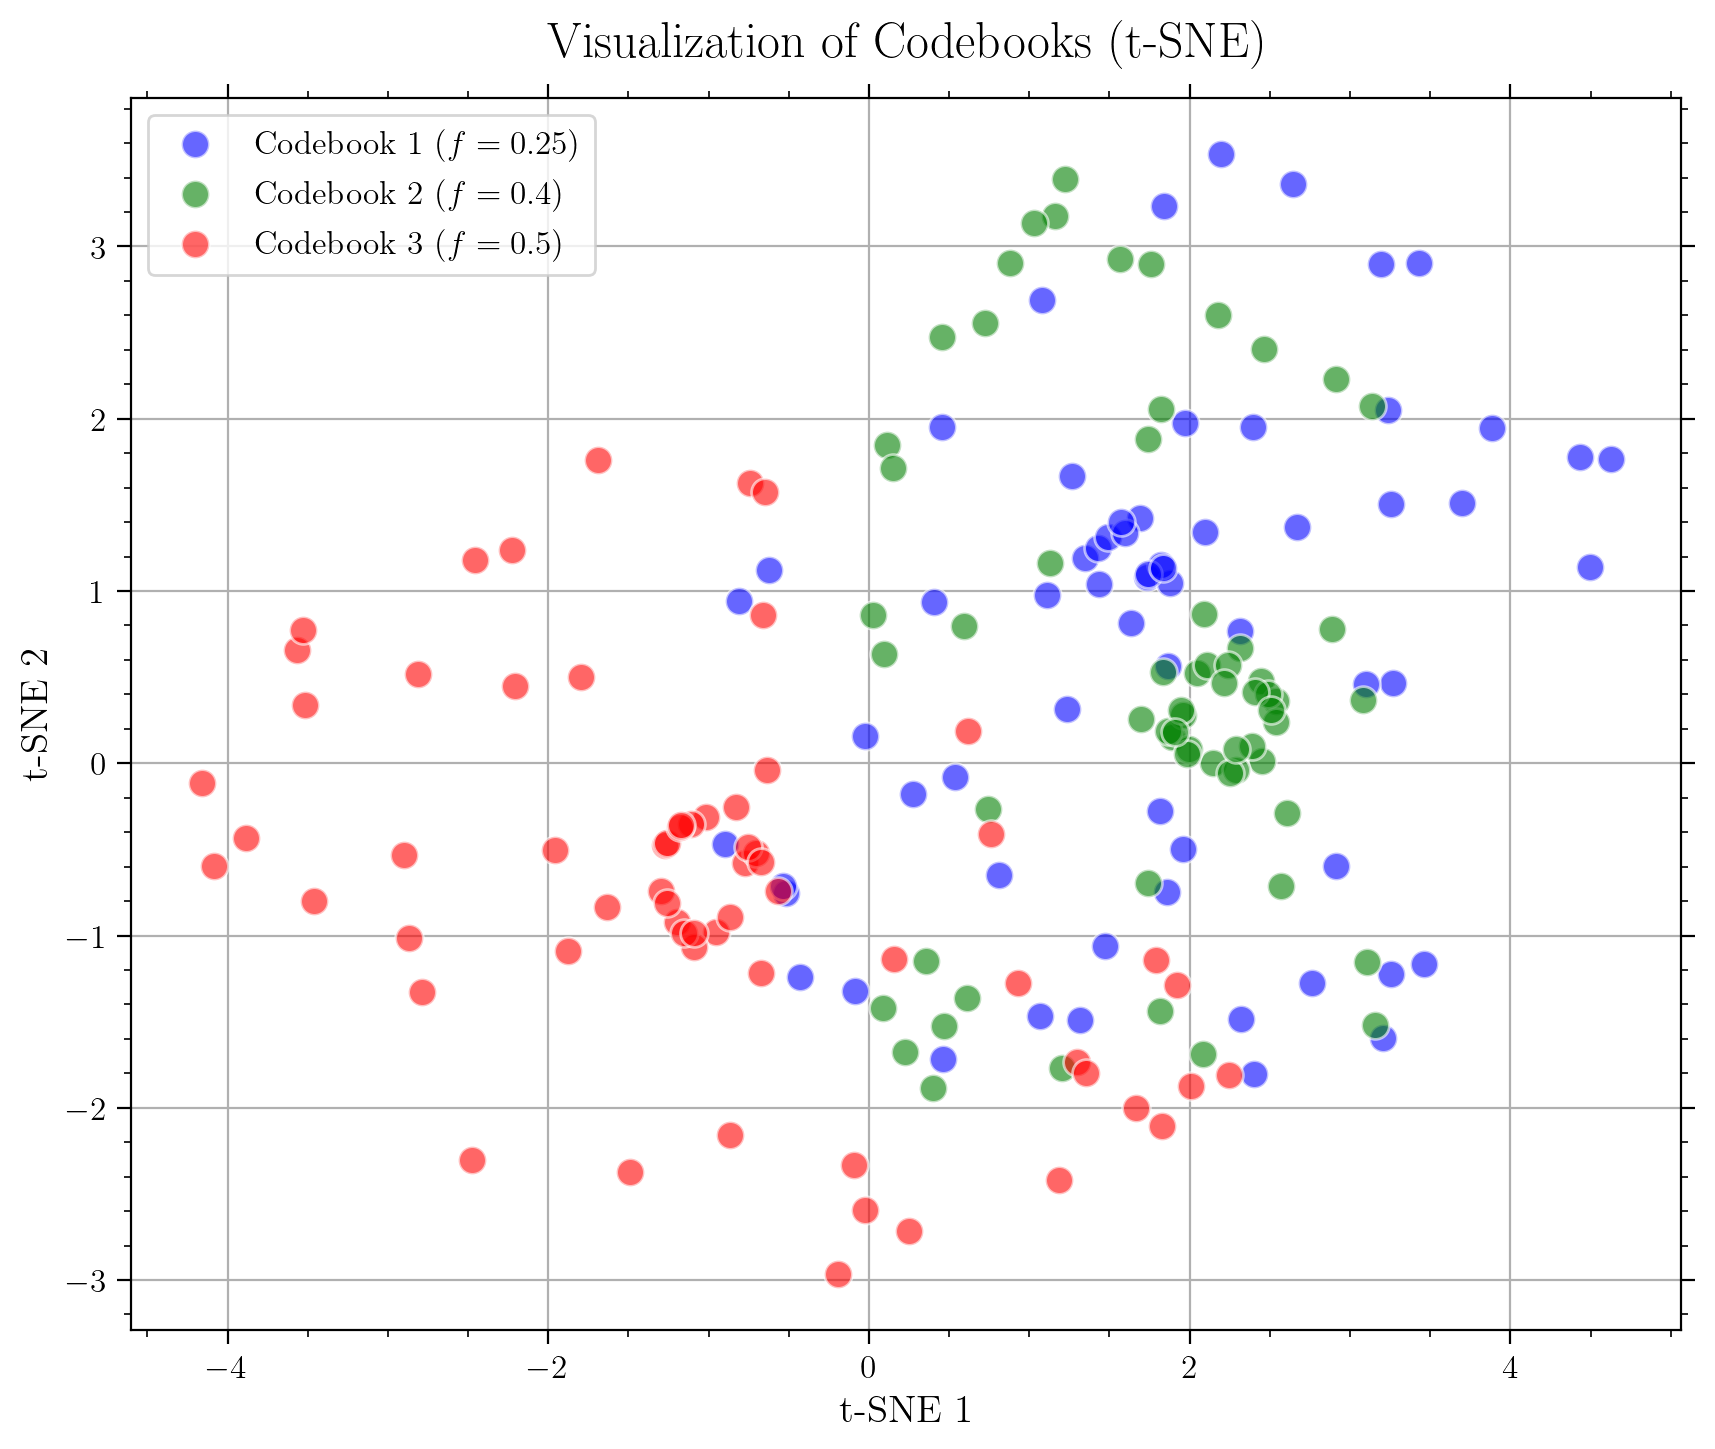

In [3]:
file_paths = [
    "../results/Inpainting Fraction = 0.25/codebook_inpainting_0.25.npy",
    "../results/Inpainting Fraction = 0.4/codebook_inpainting_0.4.npy",
    "../results/Inpainting Fraction = 0.5/codebook_inpainting_0.5.npy",
]  # Replace with actual file paths

labels = ["Codebook 1 $(f=0.25)$", "Codebook 2 $(f=0.4)$", "Codebook 3 $(f=0.5)$"]

visualize_codebooks_from_paths(file_paths, labels)

In [4]:
codebook1 = np.load(
    "../results/Inpainting Fraction = 0.25/codebook_inpainting_0.25.npy"
)
codebook2 = np.load("../results/Inpainting Fraction = 0.4/codebook_inpainting_0.4.npy")
codebook3 = np.load("../results/Inpainting Fraction = 0.5/codebook_inpainting_0.5.npy")

mean1 = np.mean(codebook1, axis=0)
mean2 = np.mean(codebook2, axis=0)
mean3 = np.mean(codebook3, axis=0)